<a href="https://colab.research.google.com/github/monjjjjj/stockprice_prediction/blob/main/stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
training_set = pd.read_csv('Starbuks_Stock_2014_2018.csv')

In [ ]:
training_set.head()

,Date,Open,High,Low,Close/Last,Volume
0,12/31/2018,63.77,64.61,63.66,64.40,7689617
1,12/28/2018,63.31,64.12,63.17,63.39,7711871
2,12/27/2018,62.62,63.24,61.62,63.20,11303400
3,12/26/2018,60.95,63.23,60.67,63.08,16457050
4,12/24/2018,61.48,61.82,60.42,60.56,6323252


In [ ]:
training_set = training_set.iloc[:,1:2].values

sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)

X_train = training_set[0:1225]
y_train = training_set[1:1226]
X_train = np.reshape(X_train, (1225, 1, 1))
regressor = Sequential()


In [ ]:
regressor.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))
regressor.add(Dense(units = 1))
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, batch_size = 32, epochs = 100)
test_set = pd.read_csv('Starbuks_Stock_2019_test.csv')
real_stock_price = test_set.iloc[:,1:2].values
inputs = real_stock_price
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (7, 1, 1))
predicted_stock_price = regressor.predict(inputs)

predicted_stock_price = sc.inverse_transform(predicted_stock_price)

Epoch 1/100
39/39 [==============================] - 1s 5ms/step - loss: 0.1530
Epoch 2/100
39/39 [==============================] - 0s 4ms/step - loss: 0.0974
Epoch 3/100
39/39 [==============================] - 0s 4ms/step - loss: 0.0662
Epoch 4/100
39/39 [==============================] - 0s 5ms/step - loss: 0.0512
Epoch 5/100
39/39 [==============================] - 0s 4ms/step - loss: 0.0452
Epoch 6/100
39/39 [==============================] - 0s 5ms/step - loss: 0.0428
Epoch 7/100
39/39 [==============================] - 0s 4ms/step - loss: 0.0417
Epoch 8/100
39/39 [==============================] - 0s 5ms/step - loss: 0.0409
Epoch 9/100
39/39 [==============================] - 0s 4ms/step - loss: 0.0401
Epoch 10/100
39/39 [==============================] - 0s 5ms/step - loss: 0.0393
Epoch 11/100
39/39 [==============================] - 0s 4ms/step - loss: 0.0385
Epoch 12/100
39/39 [==============================] - 0s 4ms/step - loss: 0.0376
Epoch 13/100
39/39 [=================

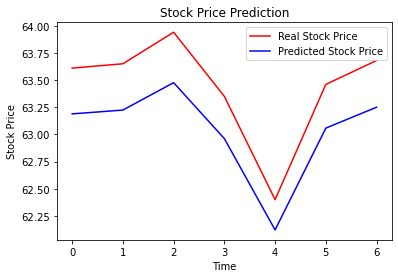

In [ ]:
plt.plot(real_stock_price, color = 'red', label = 'Real Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

39/39 [==============================] - 0s 2ms/step


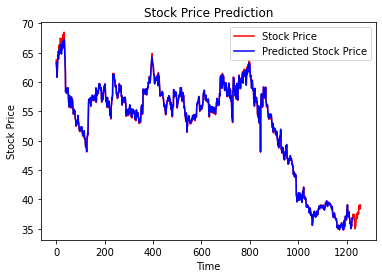

In [ ]:
# Making predictions for the entire dataset
# Getting the real stock price of 2014 - 2018
real_stock_price_train = pd.read_csv('Starbuks_Stock_2014_2018.csv')
real_stock_price_train = real_stock_price_train.iloc[:,1:2].values

# Getting the predicted stock price of 2012 - 2016
predicted_stock_price_train = regressor.predict(X_train)
predicted_stock_price_train = sc.inverse_transform(predicted_stock_price_train)

# Visualising the results
plt.plot(real_stock_price_train, color = 'red', label = 'Stock Price')
plt.plot(predicted_stock_price_train, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))